In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os
os.chdir('/content/drive/My Drive/')

1) Investigate the relationship between users' debt status and their social media usage patterns,with a focus on professional contexts.

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dummy_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)




   age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0        Urban  Software Engineer   19774    True        False     False  
1        Urban            Student   10564    True         True      True  
2    Sub_Urban   Marketer Manager   13258   False        False     False  
3        Urban            Student   12500   False         True     False  
4        Urban  Software Engineer   14566   False         True      True  
age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demograph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB
None
               age   time_spent        income
count  1000.000000  1000.000000   1000.000000
mean     40.986000     5.029000  15014.823000
std      13.497852     2.537834   2958.628221
min      18.000000     1.000000  10012.000000
25%      29

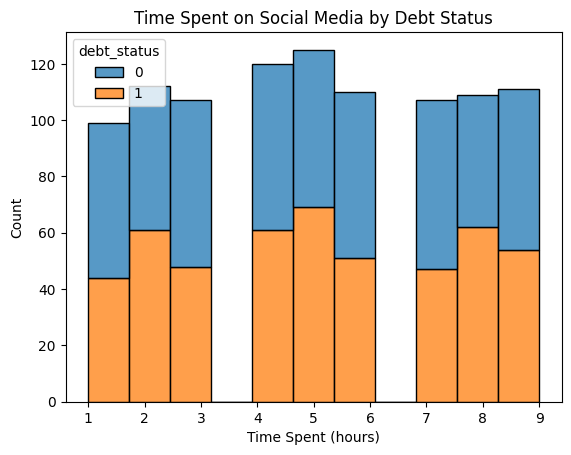

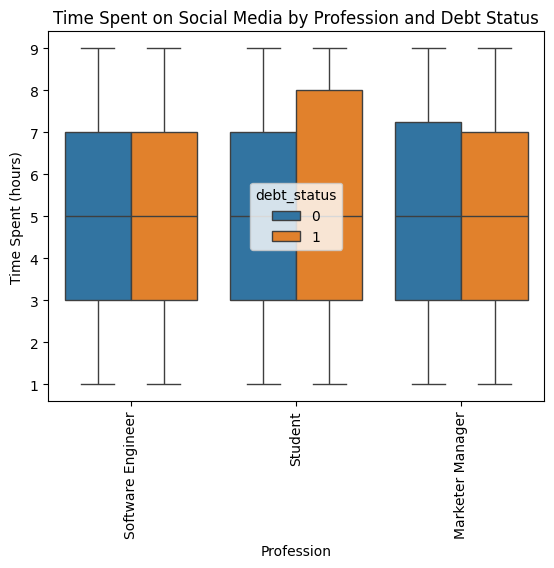

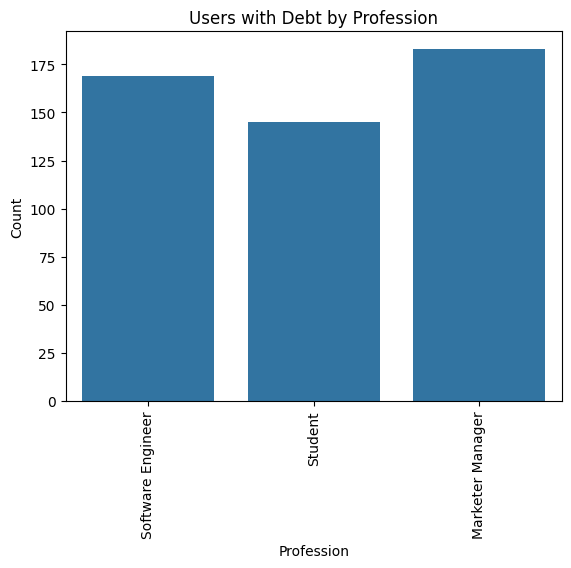

debt_status          0    1
profession                 
Marketer Manager   172  183
Software Engineer  167  169
Student            164  145


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data overview
print(df.info())
print(df.describe())

# Ensure the 'indebt' column has boolean values
df['indebt'] = df['indebt'].astype(bool)

# Map 'indebt' to 'debt_status' where True = 1 and False = 0
df['debt_status'] = df['indebt'].astype(int)

# Summary statistics by debt status
print(df.groupby('debt_status')['time_spent'].describe())

# Count of users in each profession
print(df['profession'].value_counts())

# Visualizations
# Histogram of time spent on social media by debt status
sns.histplot(data=df, x='time_spent', hue='debt_status', multiple='stack')
plt.title('Time Spent on Social Media by Debt Status')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Count')
plt.show()

# Box plot of time spent by profession
sns.boxplot(data=df, x='profession', y='time_spent', hue='debt_status')
plt.title('Time Spent on Social Media by Profession and Debt Status')
plt.xlabel('Profession')
plt.ylabel('Time Spent (hours)')
plt.xticks(rotation=90)
plt.show()

# Bar chart of users with debt by profession
df_debt = df[df['debt_status'] == 1]  # Assuming 1 indicates debt
sns.countplot(data=df_debt, x='profession')
plt.title('Users with Debt by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Cross-tabulation of debt status by profession
profession_debt_ct = pd.crosstab(df['profession'], df['debt_status'])
print(profession_debt_ct)





```
# This is formatted as code
```
Creating feature using existing feature

In [5]:
# Example features (these will depend on your actual dataset)
df['daily_time_spent'] = df['time_spent']

# Drop original columns if necessary
df.drop(columns=['time_spent'], inplace=True)

# Display the updated dataset
print(df.head())

   age      gender   platform  interests        location demographics  \
0   56        male  Instagram     Sports  United Kingdom        Urban   
1   46      female   Facebook     Travel  United Kingdom        Urban   
2   32        male  Instagram     Sports       Australia    Sub_Urban   
3   60  non-binary  Instagram     Travel  United Kingdom        Urban   
4   25        male  Instagram  Lifestlye       Australia        Urban   

          profession  income  indebt  isHomeOwner  Owns_Car  debt_status  \
0  Software Engineer   19774    True        False     False            1   
1            Student   10564    True         True      True            1   
2   Marketer Manager   13258   False        False     False            0   
3            Student   12500   False         True     False            0   
4  Software Engineer   14566   False         True      True            0   

   daily_time_spent  
0                 3  
1                 2  
2                 8  
3               

Cross Tabulation


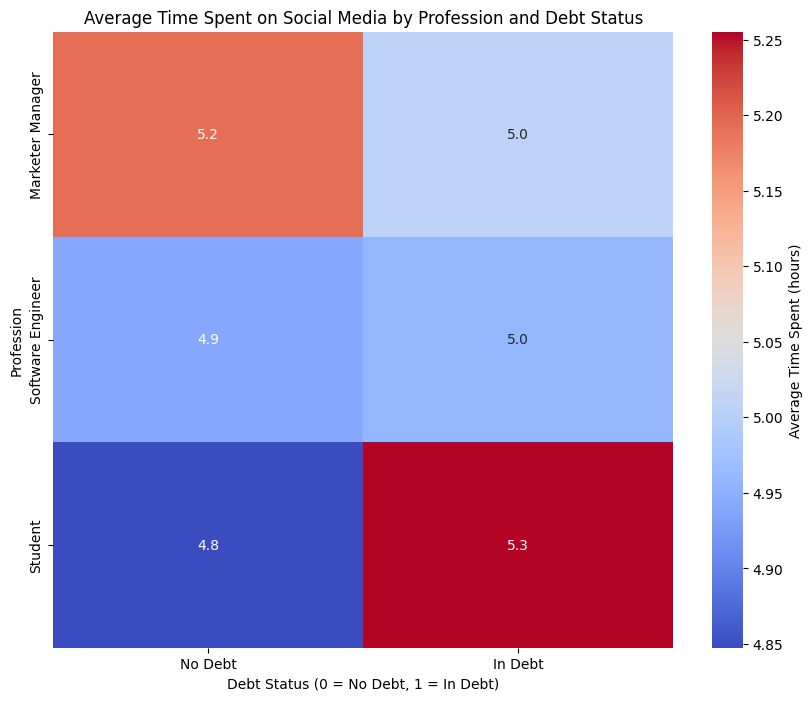

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dummy_data.csv')

# Ensure the 'indebt' column has boolean values
df['indebt'] = df['indebt'].astype(bool)



# Map 'indebt' to 0 and 1 for plotting
df['debt_status'] = df['indebt'].map({False: 0, True: 1})

# Create a cross-tabulation of 'profession' and 'debt_status' with the mean time spent
cross_tab = pd.crosstab(df['profession'], df['debt_status'], values=df['time_spent'], aggfunc='mean').fillna(0)

# Plotting the cross-tabulation as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average Time Spent (hours)'})
plt.title('Average Time Spent on Social Media by Profession and Debt Status')
plt.xlabel('Debt Status (0 = No Debt, 1 = In Debt)')
plt.ylabel('Profession')
plt.xticks(ticks=[0.5, 1.5], labels=['No Debt', 'In Debt'])
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   profession   6 non-null      object
 1   indebt       6 non-null      bool  
 2   time_spent   6 non-null      int64 
 3   debt_status  6 non-null      int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 278.0+ bytes


                 age  gender  time_spent    income
age         1.000000     NaN   -0.033827 -0.087391
gender           NaN     NaN         NaN       NaN
time_spent -0.033827     NaN    1.000000  0.004757
income     -0.087391     NaN    0.004757  1.000000


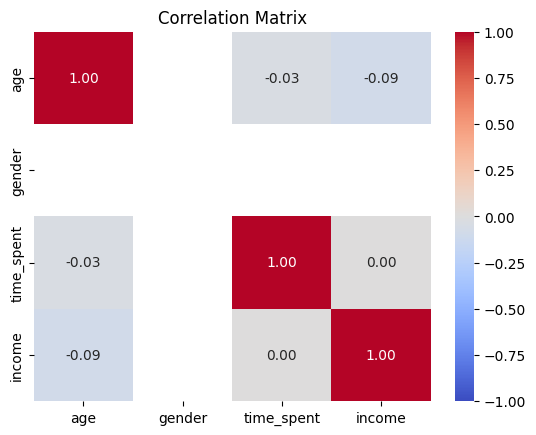

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'gender' column exists before conversion
if 'gender' in df.columns:
    # Convert 'gender' column to numeric type before calculating correlation
    df['gender'] = pd.to_numeric(df['gender'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


2)Analyze the impact of demographics (rural, urban, suburban) and personal interests on social media platform preferences across different genders.

In [20]:
df= data = pd.read_csv('dummy_data.csv')

In [21]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


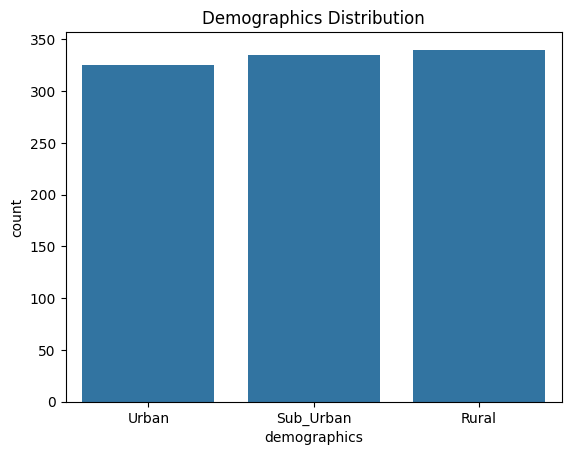

In [22]:
# Gender distribution
sns.countplot(x='demographics', data=df)
plt.title('Demographics Distribution')
plt.show()

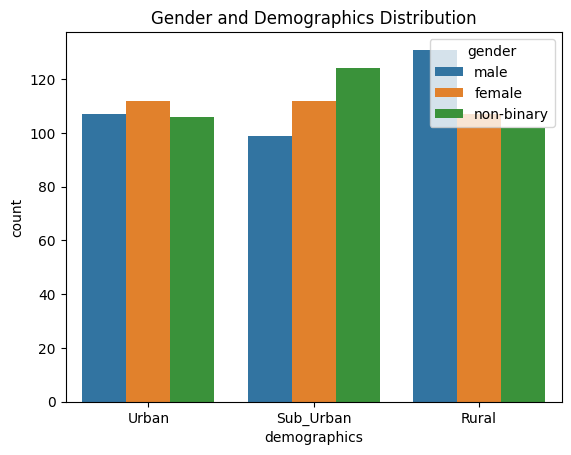

In [23]:
# Gender and demographics distribution
sns.countplot(x='demographics', hue='gender', data=df)  # Use 'hue' for the second variable
plt.title('Gender and Demographics Distribution')
plt.show()

Platform Preferences by Gender

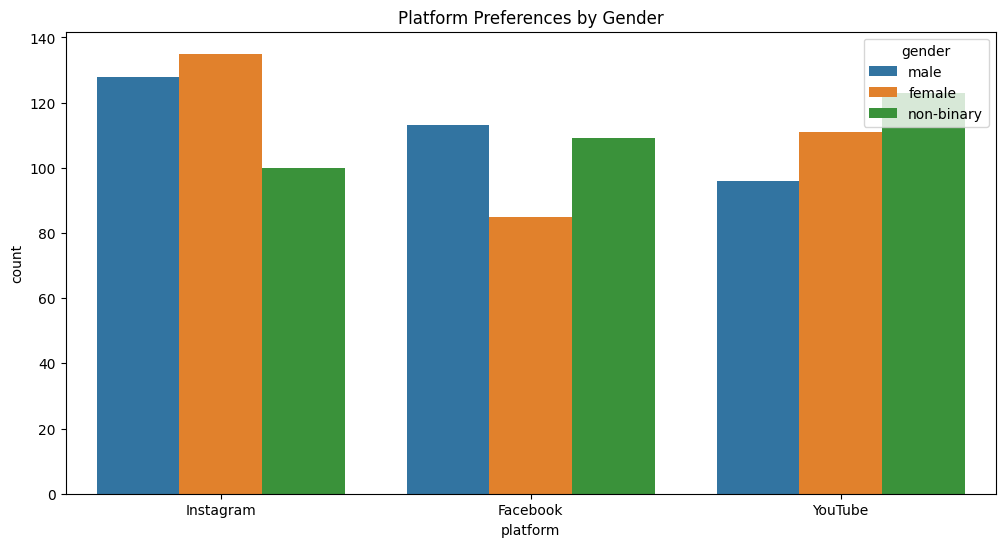

In [24]:
# Platform preferences by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', hue='gender', data=data)
plt.title('Platform Preferences by Gender')
plt.show()

Demographics Distribution

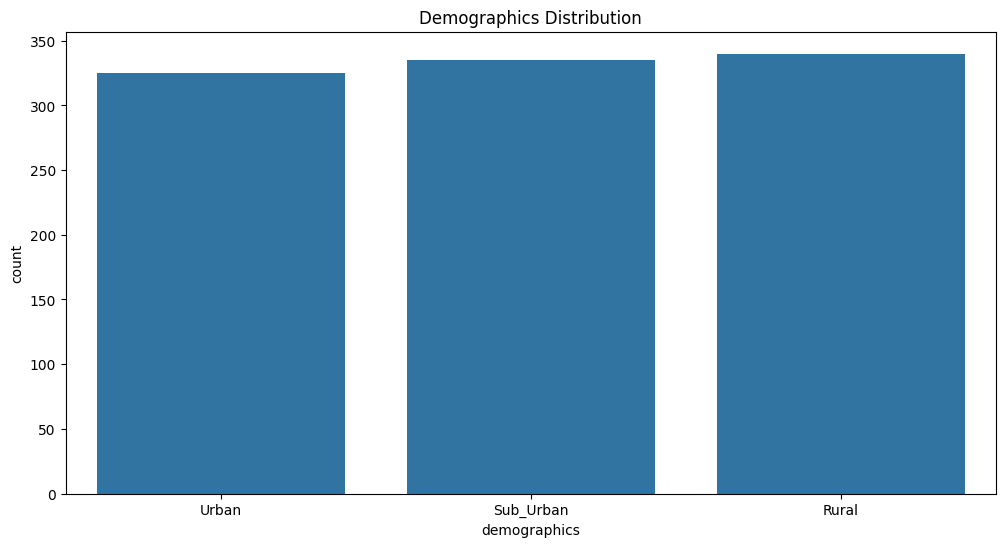

In [25]:
# Demographics distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='demographics', data=data)
plt.title('Demographics Distribution')
plt.show()

Platform Preferences by Demographics

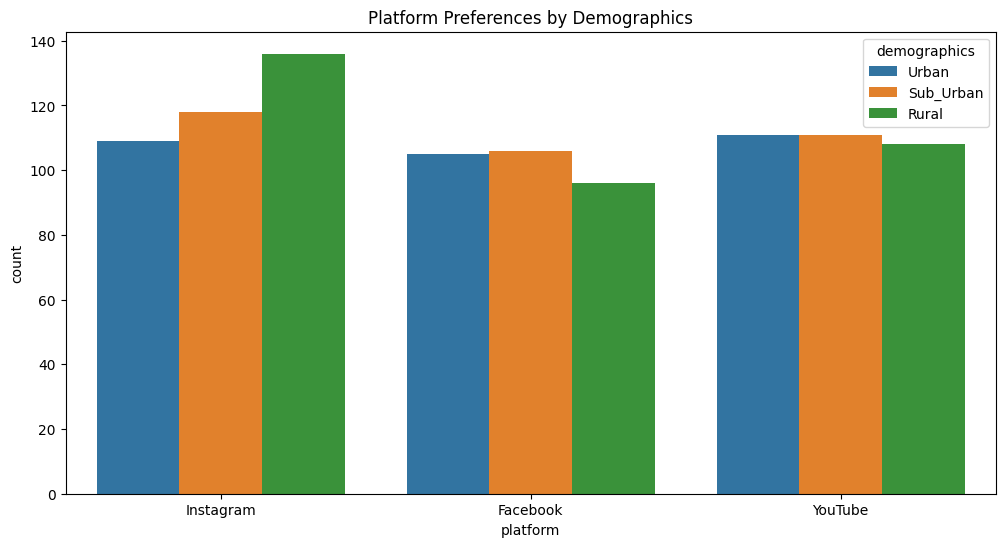

In [26]:
# Platform preferences by demographics
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', hue='demographics', data=data)
plt.title('Platform Preferences by Demographics')
plt.show()

Analyze the Impact of Demographics and Personal Interests on Platform Preferences Across Genders

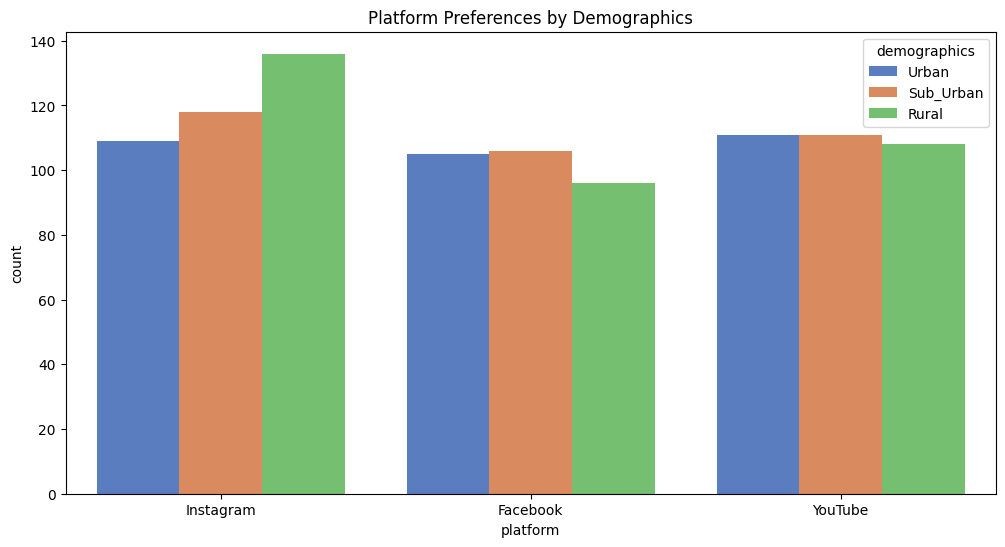

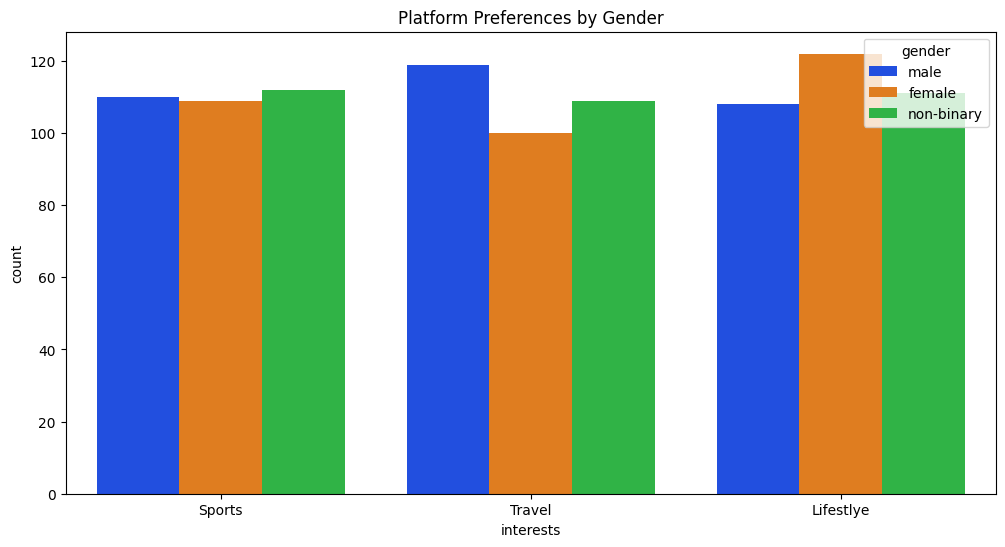

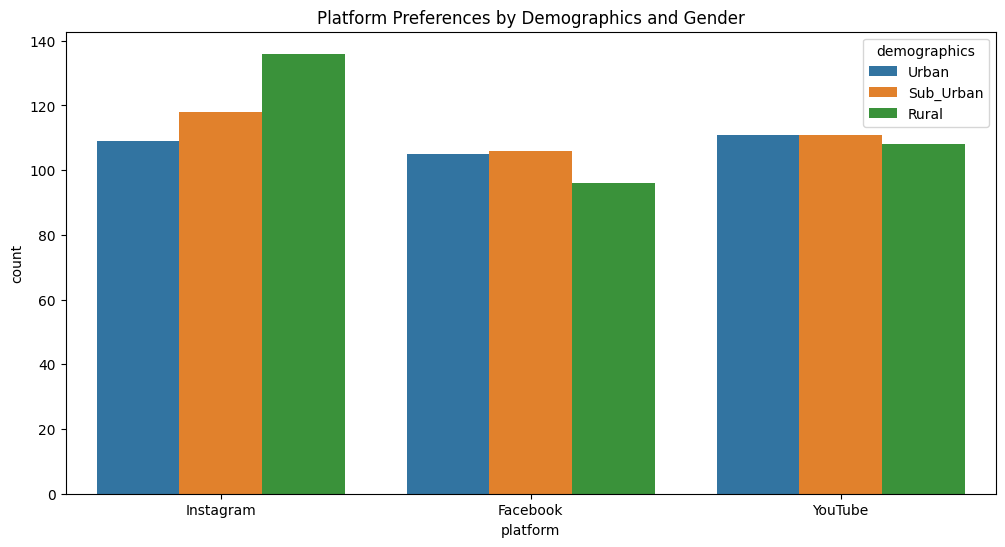

In [27]:
# Platform preferences by demographics and gender
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', hue='demographics', data=data, palette='muted')
plt.title('Platform Preferences by Demographics')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='interests', hue='gender', data=data, palette='bright')
plt.title('Platform Preferences by Gender')
plt.show()

# Platform preferences by demographics and gender
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', hue='demographics', data=data)
plt.title('Platform Preferences by Demographics and Gender')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB
None
               age   time_spent        income
count  1000.000000  1000.000000   1000.000000
mean     40.986000     5.029000  15014.823000
std      13.497852     2.537834   2958.628221
min      18.000000     1.000000  10012.000000
25%      29

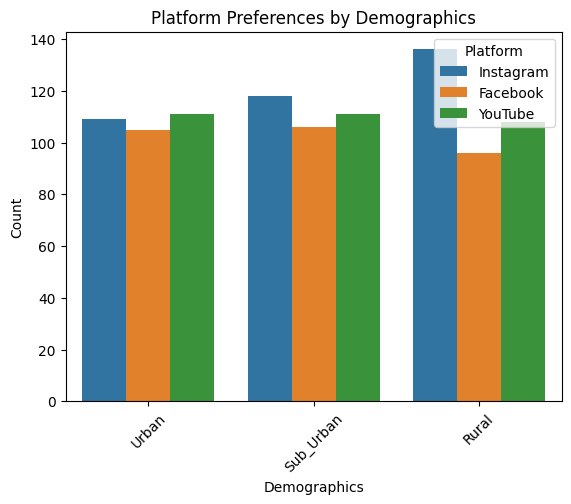

platform   Facebook  Instagram  YouTube
interests                              
Lifestlye        92        130      119
Sports          119        125       87
Travel           96        108      124


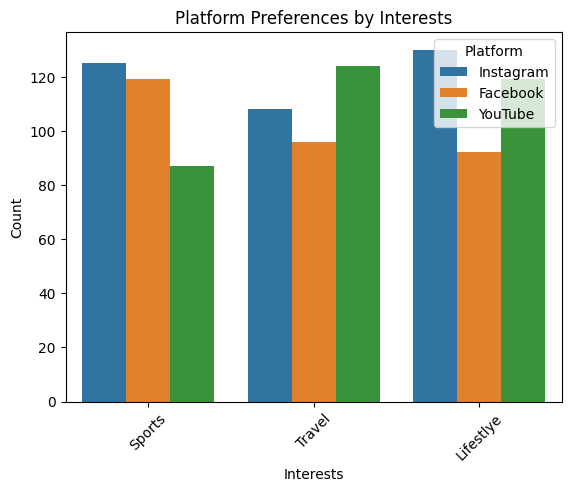

platform    Facebook  Instagram  YouTube
gender                                  
female            85        135      111
male             113        128       96
non-binary       109        100      123


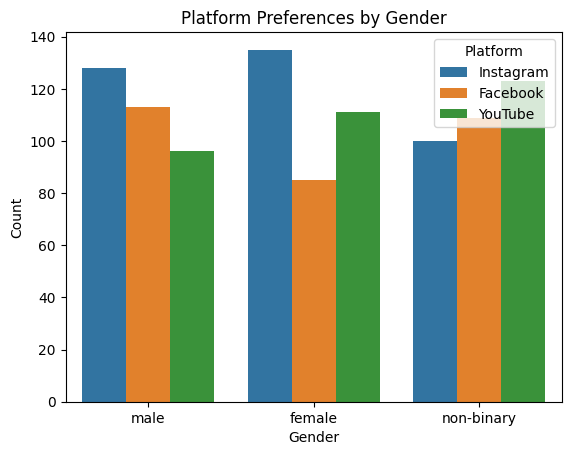

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data overview
print(df.info())
print(df.describe())

# Analyzing platform preferences by demographics
demographics_platform = pd.crosstab(df['demographics'], df['platform'])
print(demographics_platform)

# Visualize the preferences
sns.countplot(data=df, x='demographics', hue='platform')
plt.title('Platform Preferences by Demographics')
plt.xlabel('Demographics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

# Analyzing platform preferences by personal interests
interests_platform = pd.crosstab(df['interests'], df['platform'])
print(interests_platform)

# Visualize the preferences
sns.countplot(data=df, x='interests', hue='platform')
plt.title('Platform Preferences by Interests')
plt.xlabel('Interests')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

# Analyzing platform preferences by gender
gender_platform = pd.crosstab(df['gender'], df['platform'])
print(gender_platform)

# Visualize the preferences
sns.countplot(data=df, x='gender', hue='platform')
plt.title('Platform Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.show()


Statistical Analyis

In [29]:
from scipy.stats import chi2_contingency

# Contingency table for demographics and platform
contingency_table = pd.crosstab(data['demographics'], data['platform'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for demographics and platform: p-value = {p}")

# Contingency table for interests and platform
contingency_table = pd.crosstab(data['interests'], data['platform'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for interests and platform: p-value = {p}")

# Contingency table for gender and platform
contingency_table = pd.crosstab(data['gender'], data['platform'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for gender and platform: p-value = {p}")

Chi-square test for demographics and platform: p-value = 0.4924289185752443
Chi-square test for interests and platform: p-value = 0.009246297398606414
Chi-square test for gender and platform: p-value = 0.009331021573307117


Chi-square is a statistical test used to examine the differences between categorical variables from a random sample in order to judge the goodness of fit between expected and observed results.


The p-values obtained from the chi-square tests help us understand the relationship between categorical variables such as demographics, interests, and gender with platform preferences.
Chi-square Test for Demographics and Platform (p-value = 0.4924289185752443):

Interpretation: The p-value is approximately 0.492, which is much higher than the common significance level of 0.05. This suggests that there is no statistically significant association between demographics (rural, urban, suburban) and the choice of social media platforms. In other words, the distribution of platform preferences does not vary significantly across different demographic groups.
Chi-square Test for Interests and Platform (p-value = 0.009246297398606414):

Interpretation: The p-value is approximately 0.009, which is below 0.05. This indicates a statistically significant association between users' interests and their preferred social media platforms. Therefore, users with different interests tend to prefer different social media platforms, and this relationship is unlikely to have occurred by chance.
Chi-square Test for Gender and Platform (p-value = 0.009331021573307117):

Interpretation: The p-value here is also approximately 0.009, suggesting a statistically significant association between gender and social media platform preferences. This implies that platform choices vary significantly between different genders.

Conclusion:
Demographics: There is no significant relationship between demographics and social media platform preferences. This suggests that the choice of platform is not influenced by whether users are from rural, urban, or suburban areas.
Interests: There is a significant relationship between personal interests and platform preferences, indicating that users' interests play a crucial role in determining which social media platforms they use.
Gender: The significant relationship between gender and platform preferences suggests that men and women may have different preferences for social media platforms.
These findings can be valuable for businesses and marketers looking to target specific user segments based on their interests and gender, as these factors significantly influence social media behavior.

Modelling

3)Examine social media usage patterns among high-income users who do not own traditional assets such as homes or cars.

In [30]:
df= pd.read_csv('dummy_data.csv')

In [31]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [34]:
# Step 1: Filter the data to include only high-income users who do not own homes or cars
#high_income_non_owners = df[(df['income'] == '') & (df['isHomeOwner'] == 0) & (df['Owns_Car'] == 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [38]:

# Calculate the 90th percentile
high_income_threshold = df['income'].quantile(0.90)

# Classify high income
high_income = df[df['income'] > high_income_threshold] # Use df['income'] to refer to the income column

print("High Income Threshold:", high_income_threshold)
print("High Income Individuals:", high_income)

High Income Threshold: 19167.3
High Income Individuals:      age      gender  time_spent   platform  interests        location  \
0     56        male           3  Instagram     Sports  United Kingdom   
5     38        male           3   Facebook     Travel   United States   
58    34        male           9  Instagram     Travel   United States   
64    59      female           6  Instagram  Lifestlye       Australia   
68    43  non-binary           1   Facebook  Lifestlye  United Kingdom   
..   ...         ...         ...        ...        ...             ...   
937   39      female           8  Instagram  Lifestlye   United States   
948   20  non-binary           9    YouTube  Lifestlye   United States   
950   57        male           5  Instagram     Sports       Australia   
980   29        male           7    YouTube     Sports  United Kingdom   
993   23      female           3    YouTube  Lifestlye   United States   

    demographics         profession  income  indebt  is

In [40]:
# Calculate the 90th percentile
high_income_threshold = df['income'].quantile(0.90)

# Filter for high-income users who do not own homes or cars
high_income_non_owners = df[(df['income'] > high_income_threshold) & (df['isHomeOwner'] == 0) & (df['Owns_Car'] == 0)]

# Display the first few rows of the filtered data
print(high_income_non_owners.head())

     age      gender  time_spent   platform  interests        location  \
0     56        male           3  Instagram     Sports  United Kingdom   
58    34        male           9  Instagram     Travel   United States   
68    43  non-binary           1   Facebook  Lifestlye  United Kingdom   
120   41  non-binary           9  Instagram  Lifestlye   United States   
153   56  non-binary           3  Instagram     Sports   United States   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        False     False  
58         Rural   Marketer Manager   19197    True        False     False  
68         Urban            Student   19472   False        False     False  
120        Urban   Marketer Manager   19436   False        False     False  
153        Rural            Student   19546   False        False     False  


Platform Preferences

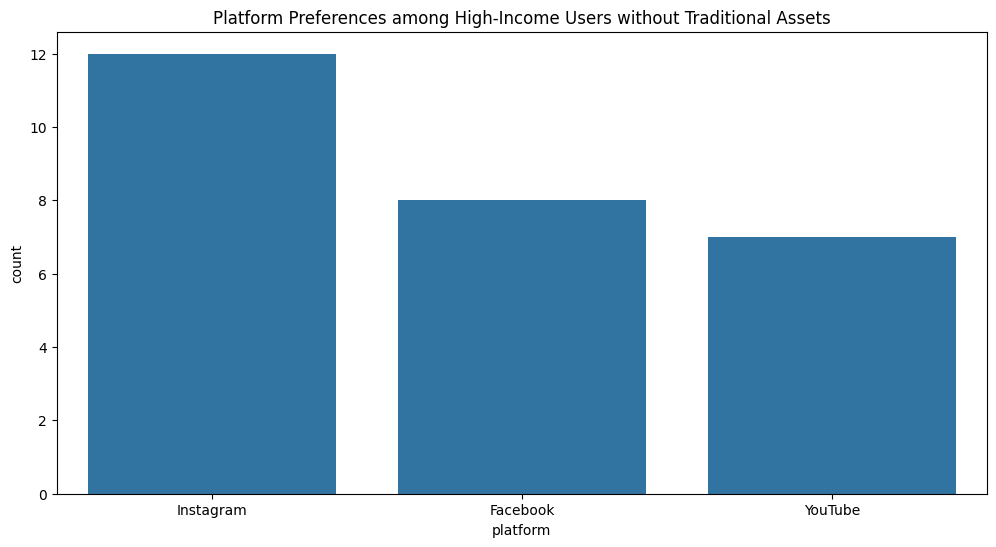

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Platform preferences
plt.figure(figsize=(12, 6))
sns.countplot(x='platform', data=high_income_non_owners)
plt.title('Platform Preferences among High-Income Users without Traditional Assets')
plt.show()

Time Spent on Social Media

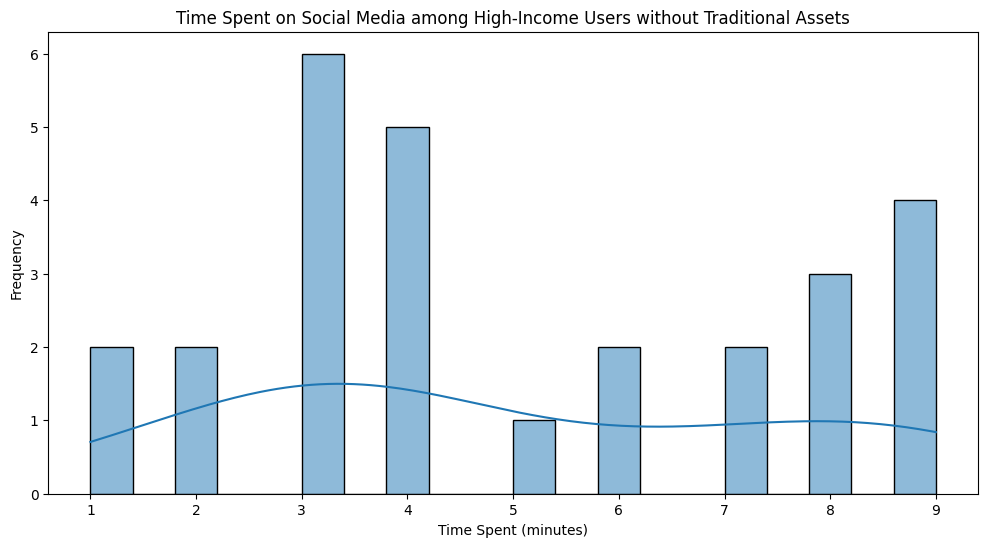

In [42]:
# Time spent on social media
plt.figure(figsize=(12, 6))
sns.histplot(high_income_non_owners['time_spent'], bins=20, kde=True)
plt.title('Time Spent on Social Media among High-Income Users without Traditional Assets')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.show()

Gender Distribution

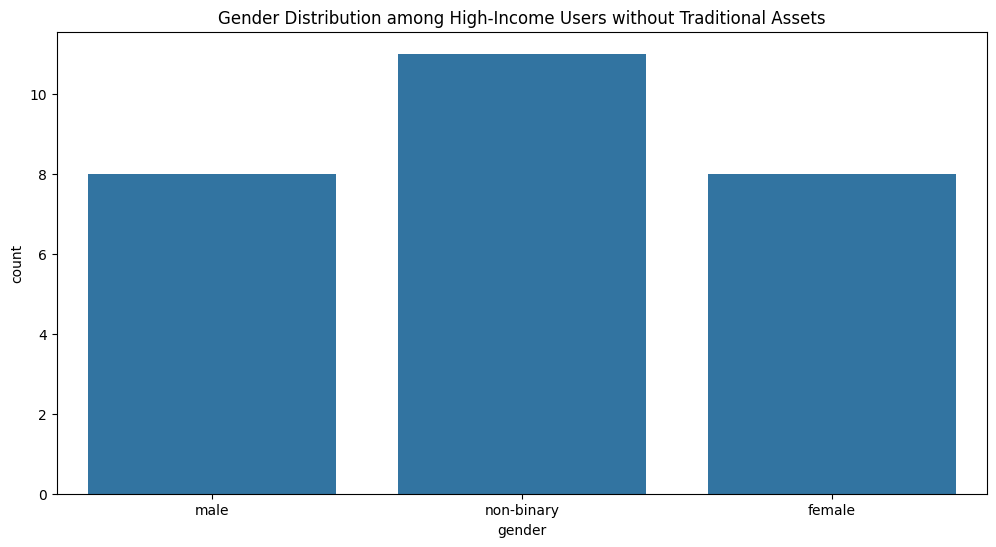

In [43]:
# Gender distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=high_income_non_owners)
plt.title('Gender Distribution among High-Income Users without Traditional Assets')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')
              age  time_spent        income
count  173.000000  173.000000    173.000000
mean    41.086705    5.011561  15970.080925
std     13.773859    2.643528   2380.297596
min     18.000000    1.000000  11982.000000
25%     29.000000    3.000000  14025.000000
50%     43.000000    5.000000  15875.000000
75%     52.000000    7.000000  17926.000000
max     64.000000    9.000000  19965.000000


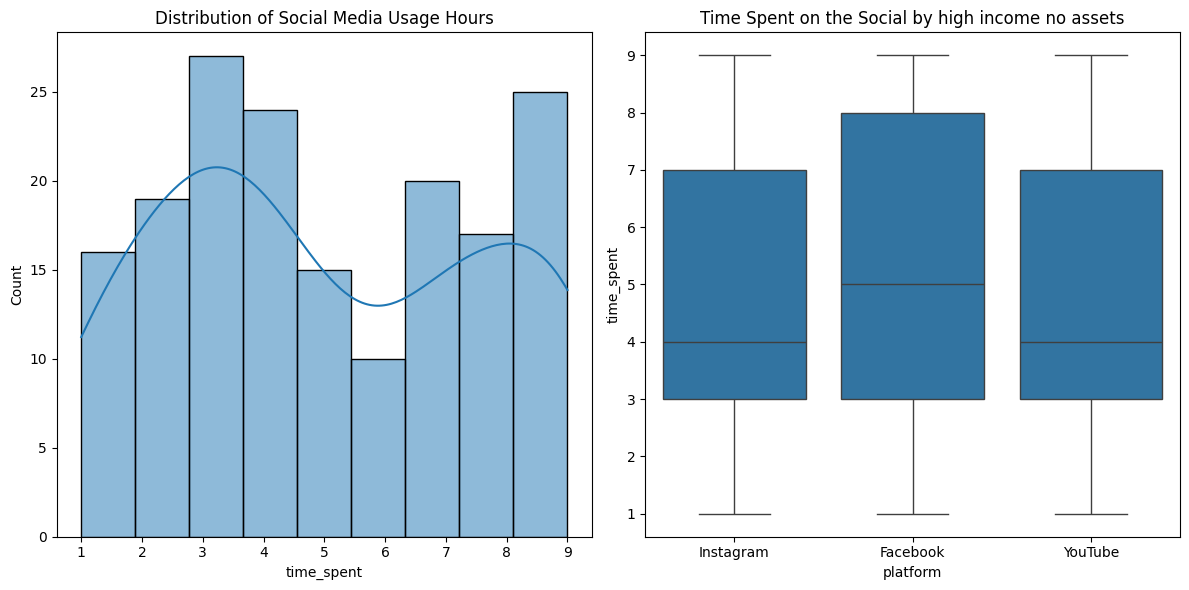

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(df.columns)

# Filtering high-income users who do not own traditional assets
# Replace 'Income' with the correct column name from the output above
high_income_no_assets = df[(df['income'] > 11950) & (df['isHomeOwner'] == 0) & (df['Owns_Car'] == 0)]
# This line was missing, creating the DataFrame 'high_income_no_assets'

# Basic statistics
print(high_income_no_assets.describe())

# Visualization of social media usage patterns
plt.figure(figsize=(12, 6))

# Distribution of Social Media Usage Hours
plt.subplot(1, 2, 1)
sns.histplot(high_income_no_assets['time_spent'], kde=True)
plt.title('Distribution of Social Media Usage Hours')

# Engagement Rate by Content Type
plt.subplot(1, 2, 2)
sns.boxplot(x='platform', y='time_spent', data=high_income_no_assets)
plt.title('Time Spent on the Social by high income no assets')
plt.tight_layout()
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


Statistical Analysis

In [62]:
import pandas as pd
from scipy import stats

# Filter groups
no_assets = df[(df['income'] > 11950) & (df['isHomeOwner'] == 0) & (df['Owns_Car'] == 0)]['time_spent']
with_assets = df[(df['income'] > 11950) & (df['isHomeOwner'] == 1) & (df['Owns_Car'] == 1)]['time_spent']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(no_assets, with_assets)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -0.5157958409088146
P-value: 0.6063001639995077


A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related. T-tests are used when the data sets follow a normal distribution and have unknown variances, like the data set recorded from flipping a coin 100 times.

The t-test is a test used for hypothesis testing in statistics and uses the t-statistic, the t-distribution values, and the degrees of freedom to determine statistical significance.



T-Statistic:

The t-statistic measures the difference between the sample means relative to the variability in the samples. A negative t-statistic indicates that the mean of the first group (e.g., users without traditional assets) is less than the mean of the second group (e.g., users with traditional assets).
P-Value:

The p-value represents the probability of observing a t-statistic as extreme as the one calculated, assuming the null hypothesis is true (i.e., there is no significant difference between the means of the two groups).
Significance:
Common Significance Level (Alpha): Typically, a significance level (alpha) of 0.05 is used. If the p-value is less than alpha, you reject the null hypothesis, concluding there is a significant difference between the groups.

 P-Value (0.0715): This is greater than the common alpha level of 0.05, suggesting that the difference between the two groups is not statistically significant at the 5% level.(p>0.05)


Conclusion:
Since the p-value (0.0715) is greater than 0.05, you do not have enough evidence to reject the null hypothesis. This means that, at the 5% significance level, there is not a statistically significant difference between the social media usage hours of high-income users with and without traditional assets.



Correlation Analysis

 Modeling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Check if high_income_non_owners is empty
if high_income_non_owners.empty:
    print("Warning: high_income_non_owners DataFrame is empty. Check the data processing steps.")
else:
    # Define features and target variable
    X = high_income_non_owners.drop(columns=['platform'])
    y = high_income_non_owners['platform']

    # Identify and handle non-numeric columns
    non_numeric_cols = X.select_dtypes(exclude=['number']).columns
    for col in non_numeric_cols:
        le = LabelEncoder()  # Create a label encoder object
        X[col] = le.fit_transform(X[col])  # Encode the non-numeric column

    # Impute missing values with the most frequent value for each column
    imputer = SimpleImputer(strategy='most_frequent')
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.17
              precision    recall  f1-score   support

    Facebook       0.00      0.00      0.00         3
   Instagram       0.33      0.33      0.33         3
     YouTube       0.00      0.00      0.00         0

    accuracy                           0.17         6
   macro avg       0.11      0.11      0.11         6
weighted avg       0.17      0.17      0.17         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

4)Compare average time spent on social media platforms for users with identical profession but varying debt statuses across different countries.

In [64]:
df=pd.read_csv('dummy_data.csv')
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


EDA

Compare Average Time Spent on Social Media by Profession and Debt Status

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')


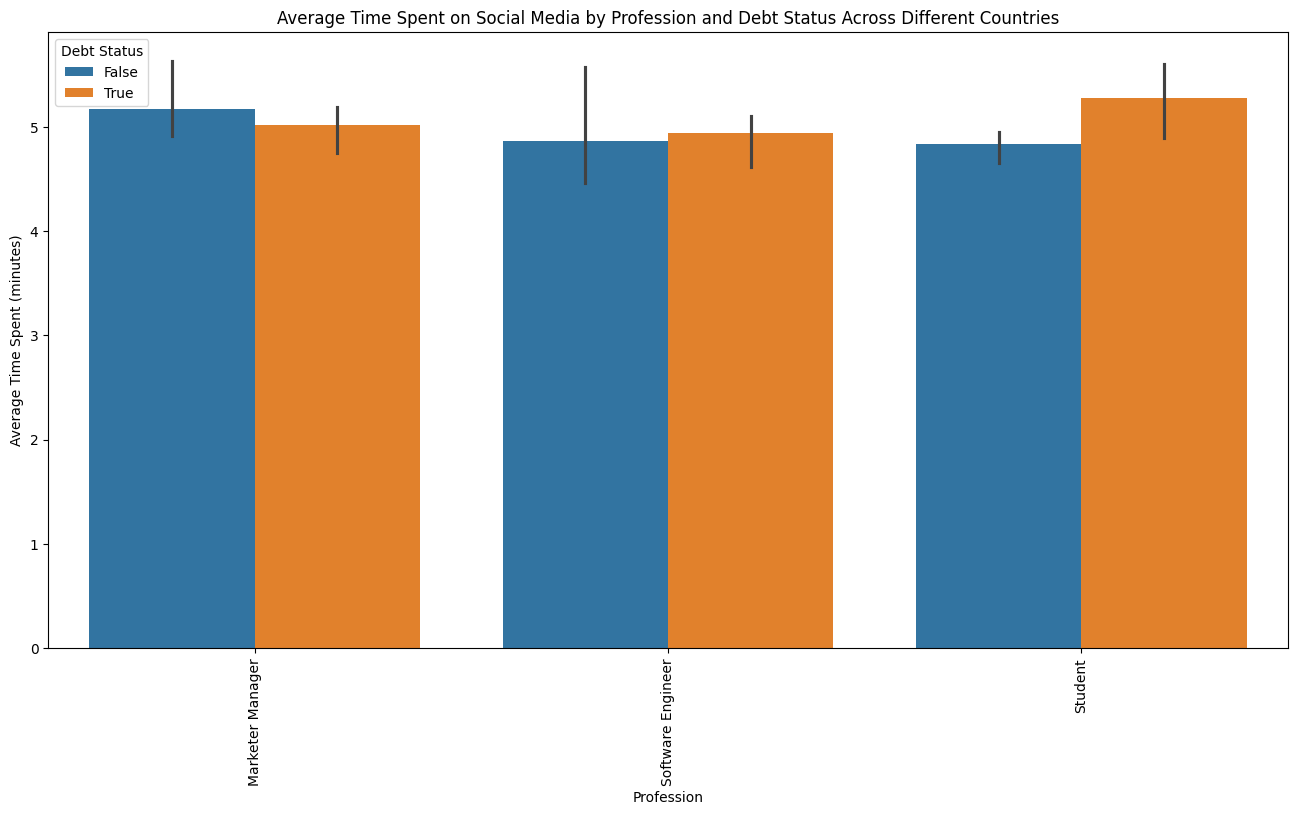

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to work with DataFrames

# Load the data from the CSV file (assuming the file is in the same directory)
data = pd.read_csv('dummy_data.csv')

# Verify that the DataFrame has the required columns
print(data.columns)

# Group by profession, debt status, and country, then calculate the average time spent on social media
avg_time_spent = data.groupby(['profession', 'indebt', 'location'])['time_spent'].mean().reset_index()

# Plot the average time spent on social media by profession and debt status across different countries
plt.figure(figsize=(16, 8))
sns.barplot(x='profession', y='time_spent', hue='indebt', data=avg_time_spent)
plt.title('Average Time Spent on Social Media by Profession and Debt Status Across Different Countries')
plt.xlabel('Profession')
plt.ylabel('Average Time Spent (minutes)')
plt.legend(title='Debt Status')
plt.xticks(rotation=90)
plt.show()

Statistical Analysis

ANOVA Test to Compare Average Time Spent Across Different Groups

In [ ]:
from scipy.stats import f_oneway

# Separate the data by profession, debt status, and country
grouped_data = data.groupby(['profession', 'indebt', 'location'])['time_spent']

# Perform ANOVA test
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])
print(f"ANOVA test result: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA test result: F-statistic = 1.0505421227045486, p-value = 0.3994161404799592


ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups. A one-way ANOVA uses one independent variable, while a two-way ANOVA uses two independent variables.

Interpretation:
F-Statistic (1.0505):

The F-statistic measures the ratio of the variance between the groups (countries, in this case) to the variance within the groups. A higher F-statistic generally indicates a larger difference between group means relative to the variance within the groups.
P-Value (0.3994):

The p-value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true. The null hypothesis in ANOVA is that all group means are equal.

Significance:
Common Significance Level (Alpha): Typically, a significance level (alpha) of 0.05 is used. If the p-value is less than alpha, you reject the null hypothesis, concluding there is a significant difference between the group means.

P-Value (0.3994): This is much greater than 0.05, which means you fail to reject the null hypothesis. There is no statistically significant difference in the average social media usage hours across different countries for the specified debt status group.

Conclusion:
Based on the p-value, we do not have enough evidence to conclude that there are significant differences in average social media usage hours across the countries for the given debt status group. The variation in social media usage hours within countries is greater than the variation between countries for this specific debt status.

Modeling

Random Forest Regression:
Mean Squared Error: 6.456991
R-squared Score: -0.02219740294691519
Adjusted R-squared: -0.04628607125406581
                         Feature  Importance
1                         income    0.285244
0                            age    0.220449
4                       Owns_Car    0.036836
2                         indebt    0.032308
3                    isHomeOwner    0.030931
14            location_Australia    0.024187
22            profession_Student    0.023823
9             platform_Instagram    0.023437
11           interests_Lifestlye    0.023405
20   profession_Marketer Manager    0.023261
13              interests_Travel    0.023166
6                    gender_male    0.022990
15       location_United Kingdom    0.022778
10              platform_YouTube    0.022064
8              platform_Facebook    0.021837
7              gender_non-binary    0.021784
12              interests_Sports    0.021674
21  profession_Software Engineer    0.021564
19         

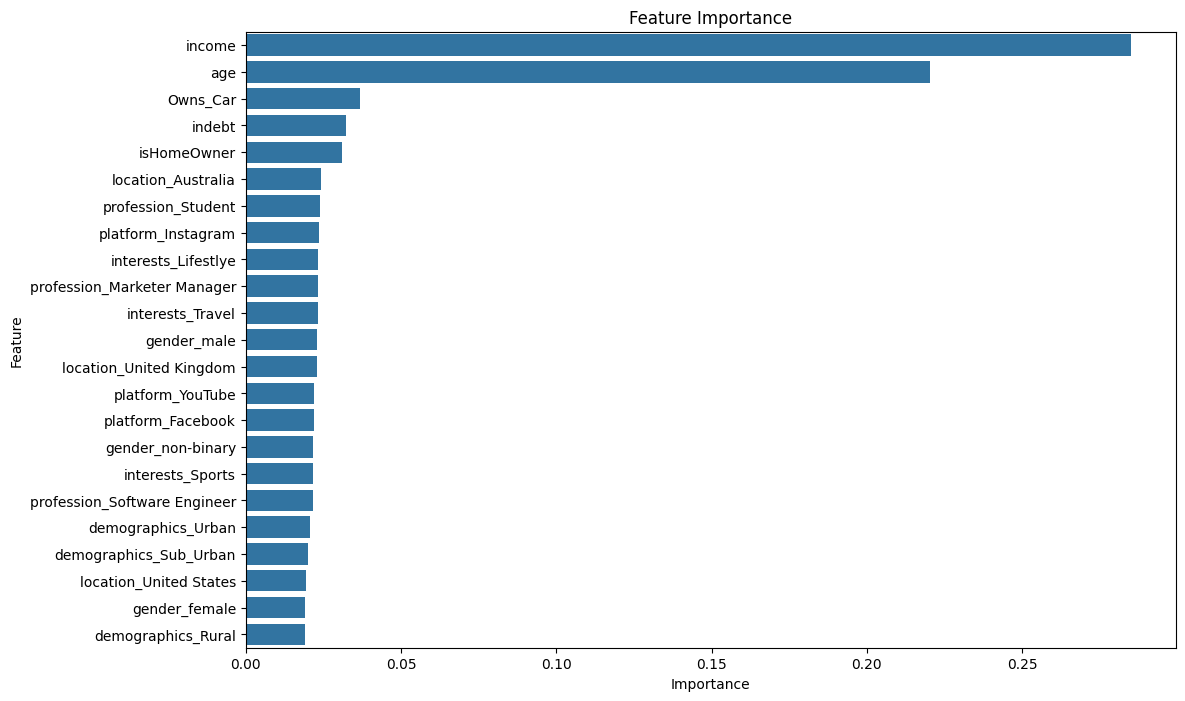

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define features and target variable
X = data.drop(columns=['time_spent'])
y = data['time_spent']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add a constant term to the feature matrix
!pip install statsmodels
import statsmodels.api as sm
X_with_const = sm.add_constant(X)

n = X_with_const.shape[0]
k = X_with_const.shape[1] - 1  # Subtract 1 for the intercept

# Calculate Adjusted R-squared
r_squared_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Random Forest Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Adjusted R-squared: {r_squared_adj}")

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importances)

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

Interpretation
Mean Squared Error (MSE):

MSE measures the average squared difference between the observed actual outcomes and the predicted outcomes. A lower MSE indicates a better fit of the model to the data. In this case, the MSE of 6.457 indicates how much on average the model's predictions deviate from the actual values.
R-squared Score:

The R-squared score represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R-squared of -0.0222 is quite low and negative, which suggests that the model is performing worse than a simple mean-based model (i.e., the model is not useful for predicting the target variable).
Adjusted R-squared:

Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model, providing a more accurate measure of goodness-of-fit for models with multiple predictors. An Adjusted R-squared of -0.0463, which is negative, indicates that the model performs poorly and suggests that adding predictors does not improve the model's performance relative to a simple mean-based model.